In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("NYS_mod_tc.csv",usecols=[2])
df.head()

,Count
0,3225769
1,3195866
2,2740553
3,2770715
4,2617333


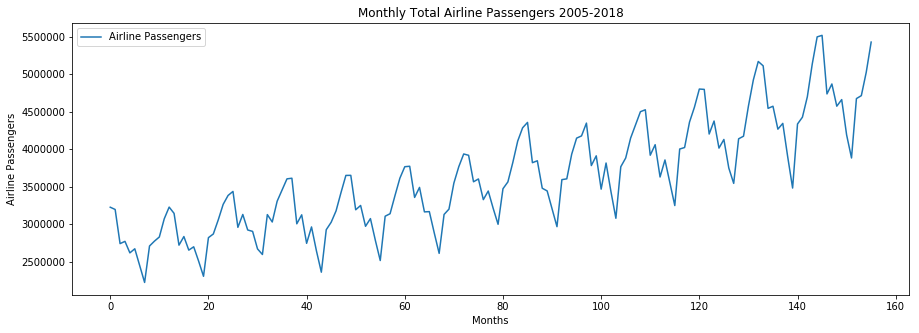

In [3]:
plt.figure(figsize = (15, 5))
plt.plot(df, label = "Airline Passengers")
plt.xlabel("Months")
plt.ylabel("Airline Passengers")
plt.title("Monthly Total Airline Passengers 2005-2018")
plt.legend()
plt.show()

In [4]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.stattools import acf,pacf

/home/sanjuprk/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [6]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

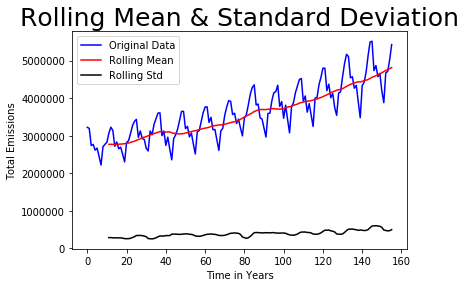

In [7]:
TestStationaryPlot(df)

In [8]:
df = df.dropna()
TestStationaryAdfuller(df.iloc[:,0])

Test Statistic                   1.133106
p-value                          0.995489
#Lags Used                      14.000000
Number of Observations Used    141.000000
Critical Value (1%)             -3.477601
Critical Value (5%)             -2.882266
Critical Value (10%)            -2.577822
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


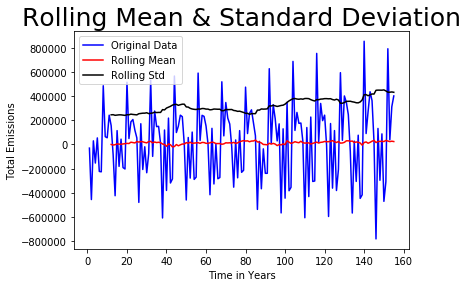

Test Statistic                  -2.950493
p-value                          0.039784
#Lags Used                      13.000000
Number of Observations Used    141.000000
Critical Value (1%)             -3.477601
Critical Value (5%)             -2.882266
Critical Value (10%)            -2.577822
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [11]:
df_first_difference = df - df.shift(1)  
TestStationaryPlot(df_first_difference.dropna(inplace=False))
df_first_difference = df_first_difference.dropna()
TestStationaryAdfuller(df_first_difference.iloc[:,0])

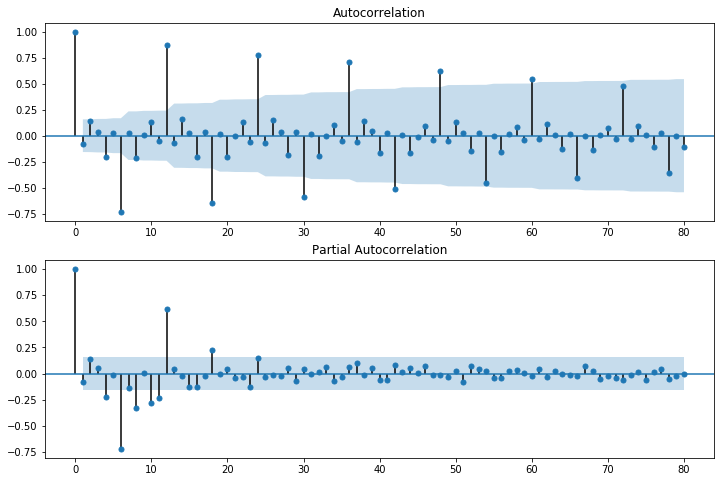

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_first_difference.dropna(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_first_difference.dropna(), lags=80, ax=ax2)

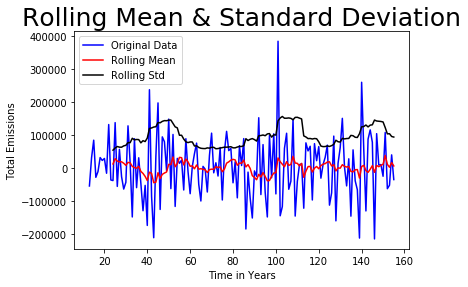

In [13]:
diff12 = df_first_difference - df_first_difference.shift(12)  
TestStationaryPlot(diff12.dropna(inplace=False))

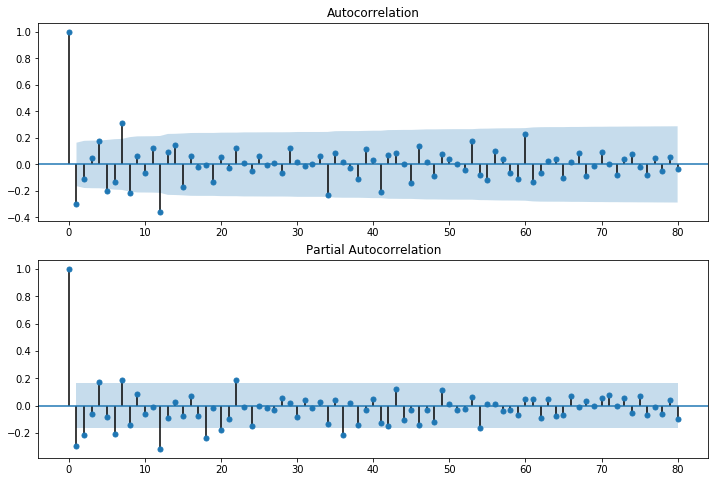

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff12.dropna(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff12.dropna(), lags=80, ax=ax2)

In [15]:
TestStationaryAdfuller(diff12.iloc[:,0].dropna())

Test Statistic                  -5.021901
p-value                          0.000020
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [16]:
ts = pd.read_csv("NYS_mod_tc.csv")
ts = ts.drop(['Unnamed: 0'],axis=1)
ts.head()

,Date,Count
0,2005-07-01 00:00:00.000000,3225769
1,2005-08-01 00:00:00.000000,3195866
2,2005-09-01 00:00:00.000000,2740553
3,2005-10-01 00:00:00.000000,2770715
4,2005-11-01 00:00:00.000000,2617333


In [17]:
ts = ts.dropna()
ts.reset_index(inplace=True)
ts['Date'] = pd.to_datetime(ts['Date'])
ts = ts.set_index('Date')
ts = ts.drop(['index'],axis=1)
ts.head()

,Count
Date,
2005-07-01,3225769
2005-08-01,3195866
2005-09-01,2740553
2005-10-01,2770715
2005-11-01,2617333


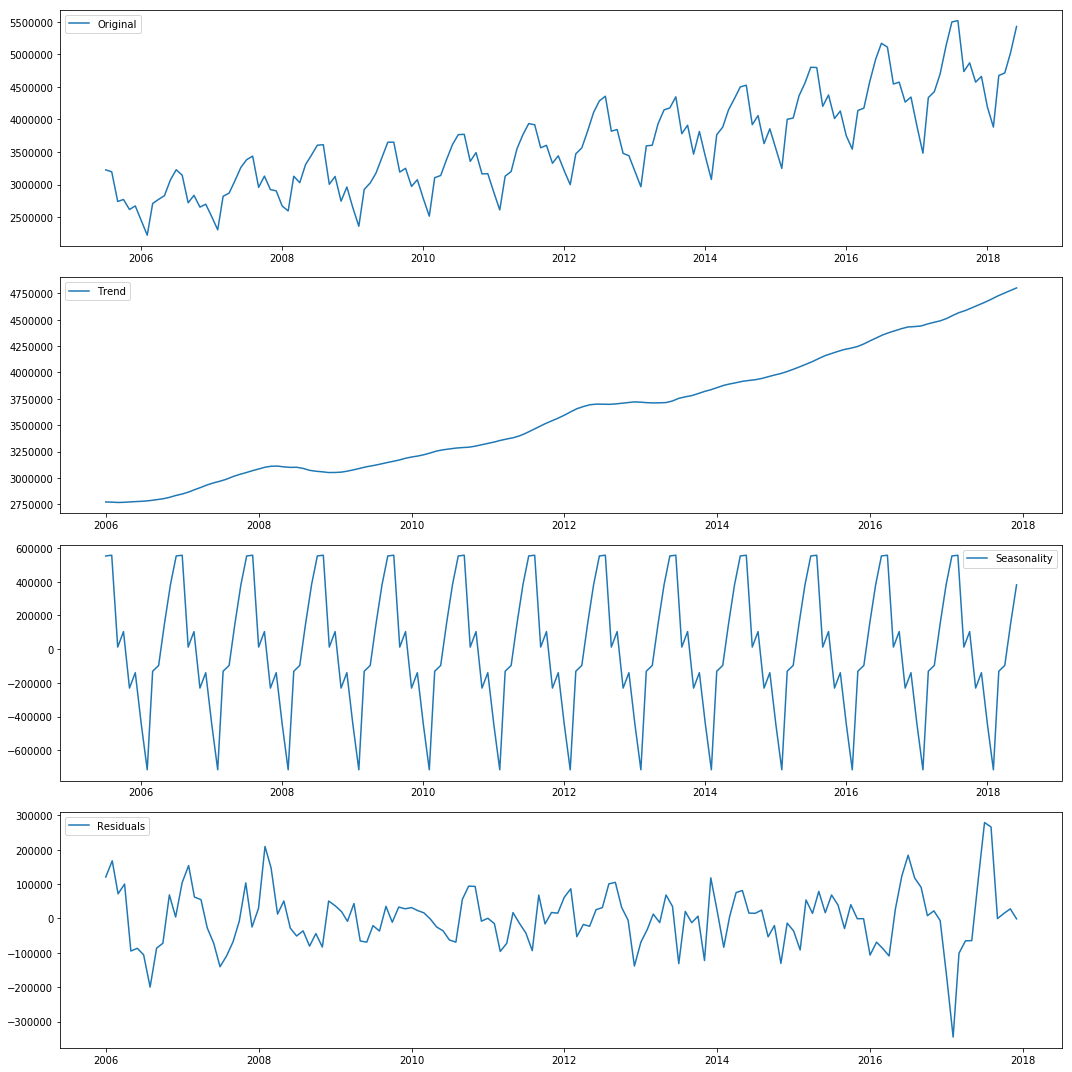

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig,ax = plt.subplots()
fig.set_size_inches(15,15)
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

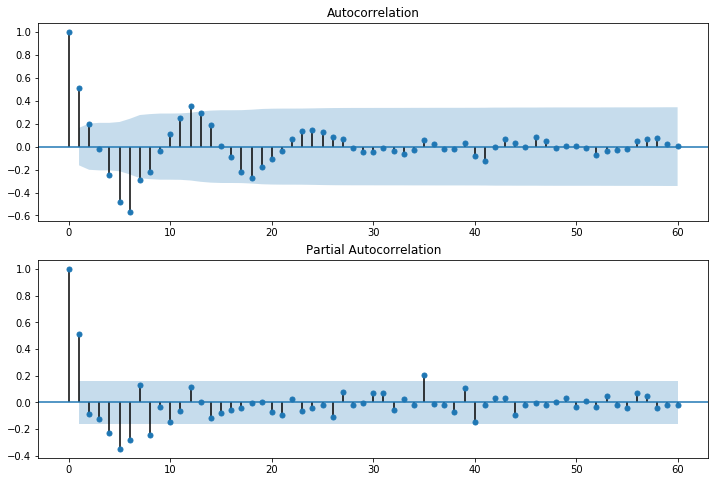

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residual.iloc[:,0].dropna(), lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residual.iloc[:,0].dropna(), lags=60, ax=ax2)

In [20]:
TestStationaryAdfuller(residual.iloc[:,0].dropna())

Test Statistic                -6.941062e+00
p-value                        1.024831e-09
#Lags Used                     9.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [21]:
mod = sm.tsa.statespace.SARIMAX(ts.iloc[:,0].dropna(), 
                                order=(0,1,1), 
                                seasonal_order=(0,1,0,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood               -1809.059
Date:                            Mon, 26 Nov 2018   AIC                           3622.118
Time:                                    07:35:16   BIC                           3628.217
Sample:                                07-01-2005   HQIC                          3624.595
                                     - 06-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3754      0.072     -5.199      0.000      -0.517      -0.234
sigma2      8.255e+09   1.62e-13   

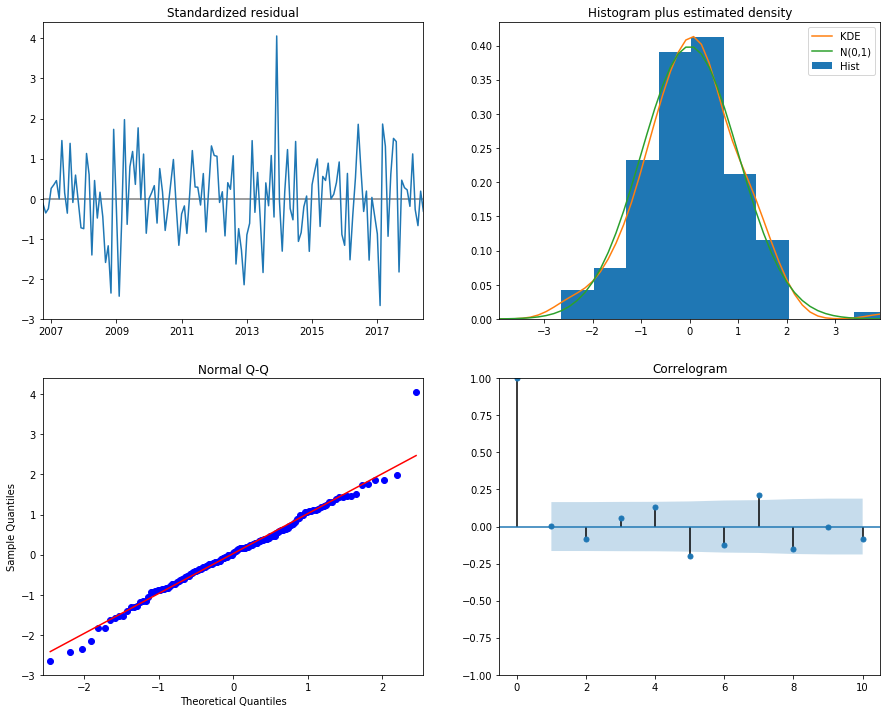

In [22]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [23]:
pred = results.get_prediction(start = 126, end = 155, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Count,upper Count
2016-01-01,3.675416e+06,4.031565e+06
2016-02-01,3.307912e+06,3.664061e+06
2016-03-01,4.097302e+06,4.453451e+06
2016-04-01,4.031445e+06,4.387594e+06
2016-05-01,4.347791e+06,4.703940e+06


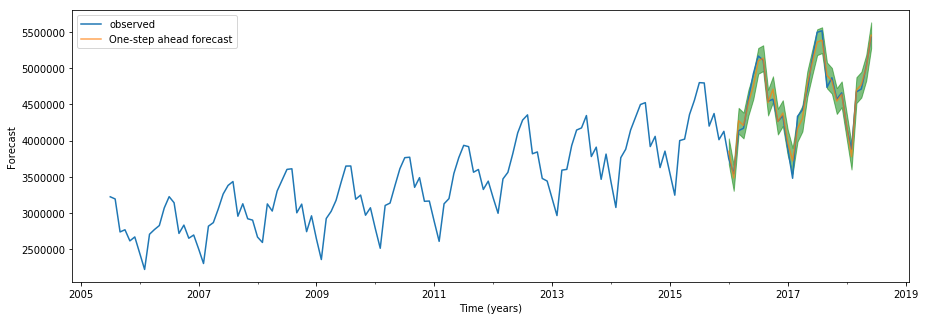

In [30]:
fig,axi = plt.subplots() 
fig.set_size_inches(15,5)
ax = ts.iloc[:,0].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Forecast')
plt.legend()

plt.show()

In [25]:
mte_forecast = pred.predicted_mean
mte_truth = ts.iloc[126:,0]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_truth))))

The Mean Squared Error (MSE) of the forecast is 9699931469.98
The Root Mean Square Error (RMSE) of the forcast: 98488.2301


In [26]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 24)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Count,upper Count
2018-07-01,5.621945e+06,5.978094e+06
2018-08-01,5.610380e+06,6.030302e+06
2018-09-01,4.801903e+06,5.277115e+06
2018-10-01,4.909824e+06,5.434532e+06
2018-11-01,4.591245e+06,5.161167e+06


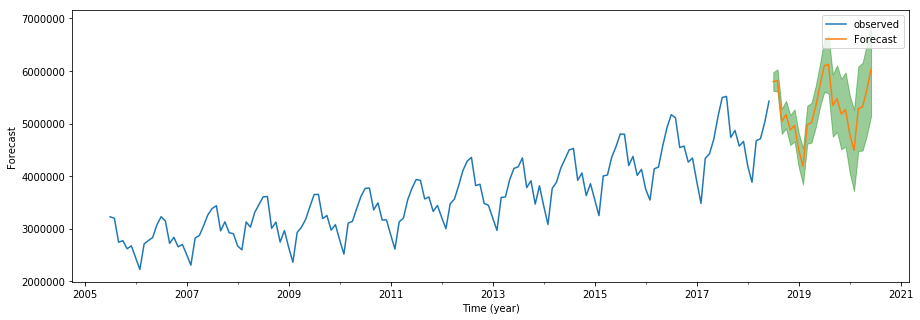

In [29]:
ax = ts.iloc[:,0].plot(label='observed', figsize=(15,5))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('Forecast')

plt.legend()
plt.show()